## Cell Segmentation in High-Content Screening
Reference:
- http://topepo.github.io/caret/pre-processing.html
- Applied Predictive Modeling (Kuhn and Johnson (2013))

In [1]:
library(AppliedPredictiveModeling)
data(segmentationOriginal)
head(segmentationOriginal)

Warning message:
"package 'AppliedPredictiveModeling' was built under R version 3.5.1"

Cell,Case,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
207827637,Test,PS,143.247705,1,185,0,15.71186,3.954802,9.548023,...,12.47468,7.609035,2.71410,0,2,2,10.64297,2,42,14
207932307,Train,PS,133.752037,0,819,1,31.92327,205.878517,69.916880,...,18.80923,56.715352,118.38814,0,0,0,32.16126,1,215,347
207932463,Train,WS,106.646387,0,431,0,28.03883,115.315534,63.941748,...,17.29564,37.671053,49.47052,0,0,0,21.18553,0,371,252
207932470,Train,PS,69.150325,0,298,0,19.45614,101.294737,28.217544,...,13.81897,30.005643,24.74954,0,0,2,13.39283,0,487,295
207932455,Test,PS,2.887837,2,285,0,24.27574,111.415441,20.474265,...,15.40797,20.504288,45.45046,0,0,0,13.19856,0,283,159
207827656,Test,WS,40.748298,2,172,0,325.93333,652.606061,128.690909,...,115.00462,70.918444,184.69291,1,0,0,15.53666,0,191,127


## Data Transformations for Individual Predictors
- Centering and Scaling
```r
library(caret)
preProcess(data,method = c("center","scale"))
```
- Transformations to Resolve Skewness

In [31]:
library(psych)
des <-  describe(segmentationOriginal)
head(des[order(des$skew,decreasing = T),c("vars","skew")])
#none of  predictors ' skew is greater than 20, but let's see how "EqEllipseOblateVolCh1" disturibute

,vars,skew
KurtIntenCh1,68,13.117127
Cell,1,7.685108
KurtIntenCh4,70,7.475310
KurtIntenCh3,69,6.005001
EqEllipseOblateVolCh1,36,5.427835
EqEllipseProlateVolCh1,38,5.394696


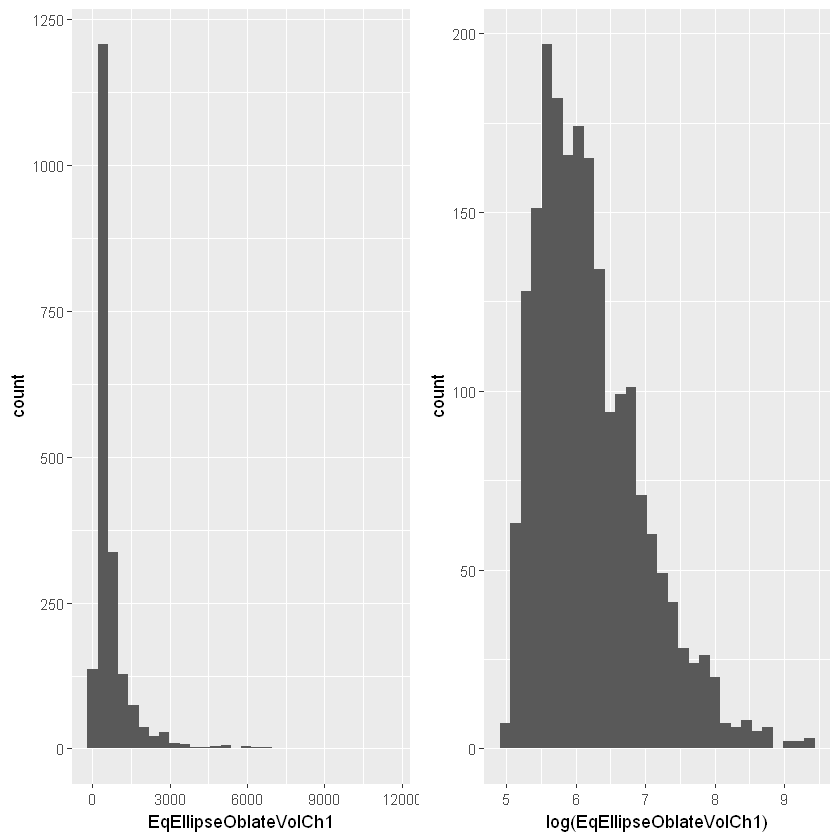

In [42]:
library(ggplot2)
p1<- ggplot(segmentationOriginal, aes(EqEllipseOblateVolCh1)) + geom_histogram(bins = 30) 
p2<- ggplot(segmentationOriginal, aes(log(segmentationOriginal$EqEllipseOblateVolCh1))) + geom_histogram(bins = 30) + 
    labs(x = "log(EqEllipseOblateVolCh1)") 
library(gridExtra)
grid.arrange(p1, p2, ncol=2)                          
# hist(segmentationOriginal$EqEllipseOblateVolCh1)
# hist(log(segmentationOriginal$EqEllipseOblateVolCh1))

## Data Transformations for Multiple Predictors
- Transformations to Resolve Outliers
- Data Reduction and Feature Extraction

## Dealing with Missing Values